In [16]:

import pandas as pd

from urllib.parse import urlparse
import hashlib

In [2]:
el_universal = pd.read_csv('../output/eluniversal_2022-12-11_articles.csv')
el_universal.head()

,body,title,url
0,Caracas.- La venezolana Yulimar Rojas no pudo ...,Correr más rápido y saltar más alto es el obje...,http://www.eluniversal.com/deportes/144757/cor...
1,Sin haber terminado la primaria y sin saber ab...,José Alfredo Jiménez cantó al alma popular,http://www.eluniversal.com/entretenimiento/144...
2,Gilberto CarreñoEL UNIVERSALAl cumplirse esta ...,“A dos meses de las tragedias ocurridas en Ara...,http://www.eluniversal.com/politica/144881/a-d...
3,Elegancia y etiqueta que se traducen en un mom...,El té se viste de celebración,http://www.eluniversal.com/gastronomia/144789/...
4,Para beneficiar a las comunidades más vulnerab...,Chevron inicia proyecto para mejorar acceso al...,http://www.eluniversal.com/venezuela/145053/ch...


In [3]:
el_universal.shape

(44, 3)

## Data Wrangling

#### 1. Añadir newspaper_uid al Dataframe

In [4]:
el_universal['newspaper_uid'] = 'eluniversal'
el_universal.head()

,body,title,url,newspaper_uid
0,Caracas.- La venezolana Yulimar Rojas no pudo ...,Correr más rápido y saltar más alto es el obje...,http://www.eluniversal.com/deportes/144757/cor...,eluniversal
1,Sin haber terminado la primaria y sin saber ab...,José Alfredo Jiménez cantó al alma popular,http://www.eluniversal.com/entretenimiento/144...,eluniversal
2,Gilberto CarreñoEL UNIVERSALAl cumplirse esta ...,“A dos meses de las tragedias ocurridas en Ara...,http://www.eluniversal.com/politica/144881/a-d...,eluniversal
3,Elegancia y etiqueta que se traducen en un mom...,El té se viste de celebración,http://www.eluniversal.com/gastronomia/144789/...,eluniversal
4,Para beneficiar a las comunidades más vulnerab...,Chevron inicia proyecto para mejorar acceso al...,http://www.eluniversal.com/venezuela/145053/ch...,eluniversal


#### 2. Obtener el host

In [5]:
el_universal['host'] = el_universal['url'].apply(lambda url: urlparse(url).netloc)
el_universal.head()

,body,title,url,newspaper_uid,host
0,Caracas.- La venezolana Yulimar Rojas no pudo ...,Correr más rápido y saltar más alto es el obje...,http://www.eluniversal.com/deportes/144757/cor...,eluniversal,www.eluniversal.com
1,Sin haber terminado la primaria y sin saber ab...,José Alfredo Jiménez cantó al alma popular,http://www.eluniversal.com/entretenimiento/144...,eluniversal,www.eluniversal.com
2,Gilberto CarreñoEL UNIVERSALAl cumplirse esta ...,“A dos meses de las tragedias ocurridas en Ara...,http://www.eluniversal.com/politica/144881/a-d...,eluniversal,www.eluniversal.com
3,Elegancia y etiqueta que se traducen en un mom...,El té se viste de celebración,http://www.eluniversal.com/gastronomia/144789/...,eluniversal,www.eluniversal.com
4,Para beneficiar a las comunidades más vulnerab...,Chevron inicia proyecto para mejorar acceso al...,http://www.eluniversal.com/venezuela/145053/ch...,eluniversal,www.eluniversal.com


In [6]:
el_universal['host'].value_counts()

www.eluniversal.com    44
Name: host, dtype: int64

#### 3. Rellenar datos faltantes

In [15]:
missing_title_mask = el_universal['title'].isna()

missing_titles = el_universal[missing_title_mask]['url'] \
    .str.extract(r'(?P<missing_titles>[^\/]+)$') \
    .applymap(lambda title: title.split('-')) \
    .applymap(lambda title_word_list: ' '.join(title_word_list))
    
missing_titles

,missing_titles


#### 4. Añadir uid a las filas

In [17]:
uids = el_universal \
    .apply(lambda row: hashlib.md5(bytes(row['url'].encode())), axis= 1) \
    .apply(lambda hash_object: hash_object.hexdigest())
        
el_universal['uid'] = uids
el_universal.set_index('uid', inplace= True)

el_universal.head()

,body,title,url,newspaper_uid,host
uid,,,,,
7aadb847089d5df9b9b4f7b88daaca1f,Caracas.- La venezolana Yulimar Rojas no pudo ...,Correr más rápido y saltar más alto es el obje...,http://www.eluniversal.com/deportes/144757/cor...,eluniversal,www.eluniversal.com
df832d45491a3c4b9c4a6820c23cea29,Sin haber terminado la primaria y sin saber ab...,José Alfredo Jiménez cantó al alma popular,http://www.eluniversal.com/entretenimiento/144...,eluniversal,www.eluniversal.com
343c0a22c7829a7b203c6a35d4deee07,Gilberto CarreñoEL UNIVERSALAl cumplirse esta ...,“A dos meses de las tragedias ocurridas en Ara...,http://www.eluniversal.com/politica/144881/a-d...,eluniversal,www.eluniversal.com
c2d6ff5f94d281843aa136ef05cf7bff,Elegancia y etiqueta que se traducen en un mom...,El té se viste de celebración,http://www.eluniversal.com/gastronomia/144789/...,eluniversal,www.eluniversal.com
175f0480dabfbec18a5a85500088aab4,Para beneficiar a las comunidades más vulnerab...,Chevron inicia proyecto para mejorar acceso al...,http://www.eluniversal.com/venezuela/145053/ch...,eluniversal,www.eluniversal.com


#### 5. Eliminar los nuevas lineas del body

In [20]:
stripped_body = el_universal \
    .apply(lambda row: row['body'], axis= 1) \
    .apply(lambda body: list(body)) \
    .apply(lambda letters: list(map(lambda letter: letter.replace('\n', ''), letters))) \
    .apply(lambda letters: ''.join(letters))
    
stripped_body

uid
7aadb847089d5df9b9b4f7b88daaca1f    Caracas.- La venezolana Yulimar Rojas no pudo ...
df832d45491a3c4b9c4a6820c23cea29    Sin haber terminado la primaria y sin saber ab...
343c0a22c7829a7b203c6a35d4deee07    Gilberto CarreñoEL UNIVERSALAl cumplirse esta ...
c2d6ff5f94d281843aa136ef05cf7bff    Elegancia y etiqueta que se traducen en un mom...
175f0480dabfbec18a5a85500088aab4    Para beneficiar a las comunidades más vulnerab...
e7966095e7e42bbf2b1d6a4aafed670e    Caracas.- La vicepresidenta ejecutiva de la Re...
12b5a3de0d367ade1607c7100ab4d920    El pasado primero de diciembre, en su cuenta d...
550ebfee942719658263f30aa499c6d5    La empresa de boletos Ticketmaster, encargada ...
ed6d53130a9d9f5871f6290b6682710a    En Rosalía se repite el efecto Almodóvar: se a...
aec561a1c24bff79dd81a71598883323    “Diego era padrino de uno de tus hijos, ¿no?”....
b42cfac9b1576883067647dbe8c10f36    El príncipe Harry y su esposa Meghan rechazaro...
dcc4509f21eae2a8cb4b0d4512ecd9e0    Los países de 

In [23]:
el_universal \
    .apply(lambda row: row['body'].replace('\n', ''), axis= 1)

uid
7aadb847089d5df9b9b4f7b88daaca1f    Caracas.- La venezolana Yulimar Rojas no pudo ...
df832d45491a3c4b9c4a6820c23cea29    Sin haber terminado la primaria y sin saber ab...
343c0a22c7829a7b203c6a35d4deee07    Gilberto CarreñoEL UNIVERSALAl cumplirse esta ...
c2d6ff5f94d281843aa136ef05cf7bff    Elegancia y etiqueta que se traducen en un mom...
175f0480dabfbec18a5a85500088aab4    Para beneficiar a las comunidades más vulnerab...
e7966095e7e42bbf2b1d6a4aafed670e    Caracas.- La vicepresidenta ejecutiva de la Re...
12b5a3de0d367ade1607c7100ab4d920    El pasado primero de diciembre, en su cuenta d...
550ebfee942719658263f30aa499c6d5    La empresa de boletos Ticketmaster, encargada ...
ed6d53130a9d9f5871f6290b6682710a    En Rosalía se repite el efecto Almodóvar: se a...
aec561a1c24bff79dd81a71598883323    “Diego era padrino de uno de tus hijos, ¿no?”....
b42cfac9b1576883067647dbe8c10f36    El príncipe Harry y su esposa Meghan rechazaro...
dcc4509f21eae2a8cb4b0d4512ecd9e0    Los países de 

#### 6. Tokenizar el titulo y el body

In [33]:
import nltk
from nltk.corpus import stopwords

nltk.download('punkt')
nltk.download('stopwords')

stop_words = set(stopwords.words('spanish'))

def tokenize_columns(df: pd.DataFrame, column_name: str) -> pd.DataFrame:
    return df \
        .dropna() \
        .apply(lambda row: nltk.word_tokenize(row[column_name]), axis= 1) \
        .apply(lambda tokens: list(filter(lambda token: token.isalpha(), tokens))) \
        .apply(lambda tokens: list(map(lambda token: token.lower(), tokens))) \
        .apply(lambda word_list: list(filter(lambda word: word not in stop_words, word_list))) \
        .apply(lambda valid_word_list: len(valid_word_list))
        
el_universal['n_tokens_title'] = tokenize_columns(el_universal, 'title')
el_universal['n_tokens_body'] = tokenize_columns(el_universal, 'body')

el_universal.head()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\adalb\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\adalb\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


uid
7aadb847089d5df9b9b4f7b88daaca1f     5
df832d45491a3c4b9c4a6820c23cea29     6
343c0a22c7829a7b203c6a35d4deee07     7
c2d6ff5f94d281843aa136ef05cf7bff     3
175f0480dabfbec18a5a85500088aab4     7
e7966095e7e42bbf2b1d6a4aafed670e    10
12b5a3de0d367ade1607c7100ab4d920     6
550ebfee942719658263f30aa499c6d5     8
ed6d53130a9d9f5871f6290b6682710a     7
aec561a1c24bff79dd81a71598883323     7
b42cfac9b1576883067647dbe8c10f36     7
dcc4509f21eae2a8cb4b0d4512ecd9e0     7
7396312fc2d529daa9aaf13cd34518b5     4
fa6a2b3d50ac00c24eb5525dcebeb1ce     9
a8b6022fd8fdeba8e7904c34d5d7870a     3
b9e24830e2dc1fb7b427cae4d72f54d2     3
d890afed8fc84fba9251788749937193     5
02740ffb91654e50fc4ce4fd36c2144f     8
a53715048252b9fda382d3e1c3e6331b     7
1d3e7d97ff238ce509a68e7e1557f9a0    10
0fdb1d2436029579c00fdeed98651a68     7
0c317ddbaea63ead8a1c8a99f3bfc47a     8
15a81fc1baae54fda5f63e9544eb3cb7     7
40bac0935c0567f897ca32a8f5704950     4
2eb97d793f749920295bd09a93460817     6
13799e68df248c603ef98

#### 7. Eliminar duplicados

In [28]:
el_universal['title'].value_counts()

Correr más rápido y saltar más alto es el objetivo                                                                          1
José Alfredo Jiménez cantó al alma popular                                                                                  1
El VAR demuestra que la tecnología en el fútbol puede fallar                                                                1
Cata de Vodka Nemiroff , producto exclusivo de Comercializadora Labraterra                                                  1
Boluarte nombra su gabinete con un exfiscal superior como primer ministro                                                   1
Venezuela pondrá fin a pruebas de Covid-19 en aeropuertos tras casi dos años                                                1
Inspeccionan terminal de pasajeros La Bandera para garantizar seguridad de usuarios                                         1
LA SOLIDARIDAD CONMEMORA OCHO DÉCADAS                                                                                 

In [29]:
el_universal.drop_duplicates(subset= ['title'], keep= 'first', inplace= True)

In [30]:
el_universal.head(10)

,body,title,url,newspaper_uid,host,n_tokens_title,n_tokens_body
uid,,,,,,,
7aadb847089d5df9b9b4f7b88daaca1f,Caracas.- La venezolana Yulimar Rojas no pudo ...,Correr más rápido y saltar más alto es el obje...,http://www.eluniversal.com/deportes/144757/cor...,eluniversal,www.eluniversal.com,5,162
df832d45491a3c4b9c4a6820c23cea29,Sin haber terminado la primaria y sin saber ab...,José Alfredo Jiménez cantó al alma popular,http://www.eluniversal.com/entretenimiento/144...,eluniversal,www.eluniversal.com,6,254
343c0a22c7829a7b203c6a35d4deee07,Gilberto CarreñoEL UNIVERSALAl cumplirse esta ...,“A dos meses de las tragedias ocurridas en Ara...,http://www.eluniversal.com/politica/144881/a-d...,eluniversal,www.eluniversal.com,7,419
c2d6ff5f94d281843aa136ef05cf7bff,Elegancia y etiqueta que se traducen en un mom...,El té se viste de celebración,http://www.eluniversal.com/gastronomia/144789/...,eluniversal,www.eluniversal.com,3,194
175f0480dabfbec18a5a85500088aab4,Para beneficiar a las comunidades más vulnerab...,Chevron inicia proyecto para mejorar acceso al...,http://www.eluniversal.com/venezuela/145053/ch...,eluniversal,www.eluniversal.com,7,120
e7966095e7e42bbf2b1d6a4aafed670e,Caracas.- La vicepresidenta ejecutiva de la Re...,Gobierno Nacional establece nuevas acciones en...,http://www.eluniversal.com/economia/145025/gob...,eluniversal,www.eluniversal.com,10,149
12b5a3de0d367ade1607c7100ab4d920,"El pasado primero de diciembre, en su cuenta d...",El abuso sexual infantil: Una epidemia que ata...,http://www.eluniversal.com/sucesos/144745/el-a...,eluniversal,www.eluniversal.com,6,508
550ebfee942719658263f30aa499c6d5,"La empresa de boletos Ticketmaster, encargada ...",Ticketmaster ofrece reembolso por duplicación ...,http://www.eluniversal.com/entretenimiento/145...,eluniversal,www.eluniversal.com,8,233
ed6d53130a9d9f5871f6290b6682710a,En Rosalía se repite el efecto Almodóvar: se a...,Rosalía: un fenómeno que va del mal querer al ...,http://www.eluniversal.com/entretenimiento/144...,eluniversal,www.eluniversal.com,7,474


In [32]:
el_universal.shape

(44, 7)

#### 8. Descriptive Analisys

In [39]:
clean_eluniversal = pd.read_csv('../output/processed/clean_eluniversal_2022-12-11_articles.csv')
clean_elpais = pd.read_csv('../output/processed/clean_elpais_2022-12-11_articles.csv')

In [40]:
clean_eluniversal.describe()

,n_tokens_title,n_tokens_body
count,44.000000,44.000000
mean,6.454545,214.454545
std,1.946428,146.639481
min,2.000000,61.000000
25%,5.750000,103.500000
50%,7.000000,153.500000
75%,8.000000,314.250000
max,11.000000,583.000000


In [41]:
clean_elpais.describe()

,n_tokens_title,n_tokens_body
count,133.000000,133.000000
mean,7.255639,63.954887
std,2.838198,25.512286
min,1.000000,8.000000
25%,6.000000,46.000000
50%,7.000000,59.000000
75%,9.000000,78.000000
max,15.000000,176.000000


In [42]:
clean_elpais.loc[clean_elpais['n_tokens_title'] == 1]

,uid,body,title,url,newspaper_uid,host,n_tokens_title,n_tokens_body
8,cde6a1205aba2d9cb0b6c937d7ea6372,Supongo que aquellos que no pueden vivir sin b...,Negros,https://elpais.com/television/2022-12-10/negro...,elpais,elpais.com,1,46
115,c7d814d2c707aa8e90c737c8190cce4f,Joan Manuel Serrat se despide. Si un artista s...,Con Serrat,https://elpais.com/opinion/2022-12-11/con-serr...,elpais,elpais.com,1,176


In [43]:
%matplotlib inline

<AxesSubplot:>

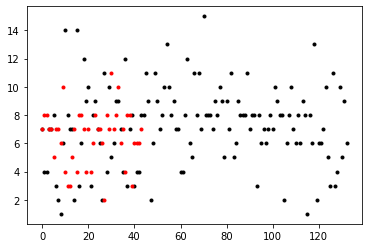

In [44]:
clean_elpais['n_tokens_title'].plot(style= 'k.')
clean_eluniversal['n_tokens_title'].plot(style= 'r.')

<AxesSubplot:>

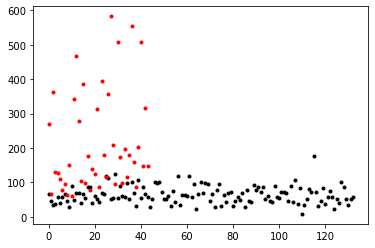

In [45]:
clean_elpais['n_tokens_body'].plot(style= 'k.')
clean_eluniversal['n_tokens_body'].plot(style= 'r.')

newspaper_uid
elpais         [[AxesSubplot(0.125,0.125;0.336957x0.755), Axe...
eluniversal    [[AxesSubplot(0.125,0.125;0.336957x0.755), Axe...
dtype: object

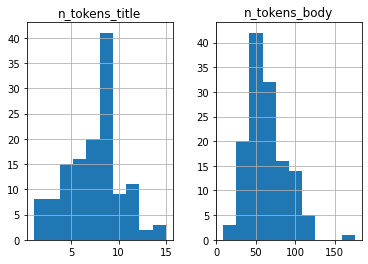

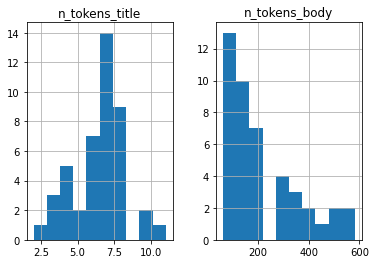

In [46]:
all_newspapers = pd.concat([clean_eluniversal, clean_elpais])

grouped = all_newspapers.groupby('newspaper_uid')

grouped.hist()

In [47]:
grouped['n_tokens_body'].agg(['min', 'mean', 'max'])

,min,mean,max
newspaper_uid,,,
elpais,8,63.954887,176
eluniversal,61,214.454545,583


newspaper_uid
elpais         AxesSubplot(0.125,0.125;0.775x0.755)
eluniversal    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

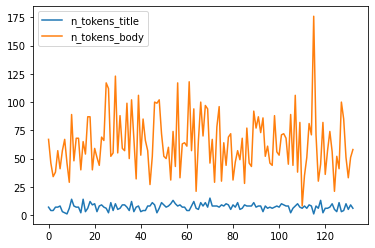

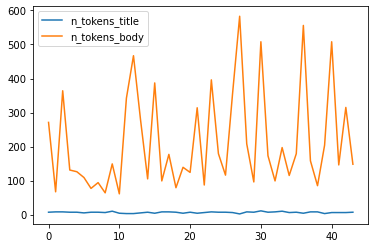

In [48]:
grouped.plot()